🎨 **ArtifyAI Enhance and Transform Images into Artistic Masterpieces**

✨ Enhance, Transform, and Elevate Your Images with State-of-the-Art AI

**🌟 Introduction**

This project showcases a powerful AI pipeline that combines image enhancement and artistic style transformation using cutting-edge deep learning models. Whether you're looking to restore old photos, apply creative filters, or generate stunning artistic renditions, this tool provides an end-to-end solution with professional-quality results.

**🔹 Key Features**

✅ High-Quality Enhancement – Uses CodeFormer to restore details, improve clarity, and upscale images.

✅ Smart Style Suggestions – CLIP analyzes your image and recommends the best artistic styles.

✅ Precise Style Transfer – Stable Diffusion + ControlNet applies transformations while preserving edges and structure.

✅ Quality Evaluation – Measures enhancement performance using PSNR, SSIM, and LPIPS metrics.



**📦 IMPORT LIBRARIES**

In [3]:
!pip install piq

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip install lpips

In [5]:
!pip install xformers

In [6]:
!pip install --upgrade torch torchvision torchaudio

In [1]:
# Import required libraries
from google.colab import files  # For file uploads in Colab
from PIL import Image  # For image processing
import matplotlib.pyplot as plt  # For displaying results
import numpy as np  # For numerical operations
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler  # Diffusion models
from transformers import CLIPProcessor, CLIPModel  # For style analysis
import torch  # Main deep learning framework
import cv2  # For edge detection
import os  # For file operations
import glob  # For path pattern matching
import gc  # For garbage collection
import shutil  # For file management
import piq  # For quality metrics (PSNR, SSIM)
import lpips  # For perceptual similarity metric
from torchvision import transforms  # For image transformations


**🛠️ Setup & Initialization**

🔧 Install Dependencies

In [2]:
!git clone https://github.com/sczhou/CodeFormer.git


fatal: destination path 'CodeFormer' already exists and is not an empty directory.


In [3]:
%cd CodeFormer
!pip install -r requirements.txt
!python basicsr/setup.py develop
!python setup.py develop
!wget -P ./weights/ https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/codeformer.pth

/content/CodeFormer
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for de


**🧹 Memory Management**

In [4]:
# Clear GPU cache
torch.cuda.empty_cache()
gc.collect()

150

 **🎨 Style Definitions**

In [5]:
# Dictionary mapping style names to their text prompts
style_prompts = {
    "Cartoon": "cartoon style, pixar-like character, clean lines, colorful, digital illustration",
    "Realistic": "realistic photo, ultra-detailed, lifelike lighting, natural shadows",
    "Anime": "anime style, crisp line art, vibrant colors, well-defined features",
    "Surreal": "surreal art, dreamlike atmosphere, imaginative yet defined",
}

**🤖 ImageTransformer Class**

Image Style Transformation System using Stable Diffusion and ControlNet

This system allows users to upload an image and transform it into different artistic styles (Cartoon, Anime, Realistic, Surreal)
using advanced AI models. The pipeline includes image enhancement, style analysis, edge detection, and style transformation.

Key Components:
1. Image Enhancement: Uses CodeFormer for face restoration and quality improvement
2. Style Analysis: Uses CLIP to recommend the most suitable styles for the input image
3. Edge Detection: Uses Canny edge detection to guide the style transfer
4. Style Transformation: Uses Stable Diffusion with ControlNet for high-quality style transfer
5. Quality Metrics: Calculates PSNR, SSIM, and LPIPS to evaluate transformation quality

Please upload an image...


Saving images3.jpeg to images3.jpeg

Select transformation:
1. AI Style Recommendation
2. Cartoon
3. Anime
4. Realistic
5. Surreal
6. Custom Prompt

Enter choice (1-6): 1
Loading models...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Enhancing image...
Downloading: "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/RealESRGAN_x2plus.pth" to /content/CodeFormer/CodeFormer/weights/realesrgan/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 274MB/s]
Downloading: "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/codeformer.pth" to /content/CodeFormer/CodeFormer/weights/CodeFormer/codeformer.pth

100% 359M/359M [00:01<00:00, 266MB/s]
Face detection model: retinaface_resnet50
Background upsampling: True, Face upsampling: True
[1/1] Processing: image.png
	detect 1 faces

All results are saved in ./output
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth

Quality Metrics:
PSNR: 32.24 dB (Higher better)
SSIM: 0.9477 (1.0 is perfect)
LPIPS: 0.0651 (0.0 is perfect)
Analyzing image for recommendations...

Recommended Styles:
1. Realistic (53.8%)
2. Cartoon (29.9%)
3. Anime (8.9%)

Select style number: 1

Applying Realistic style...


  0%|          | 0/20 [00:00<?, ?it/s]


Final Results:


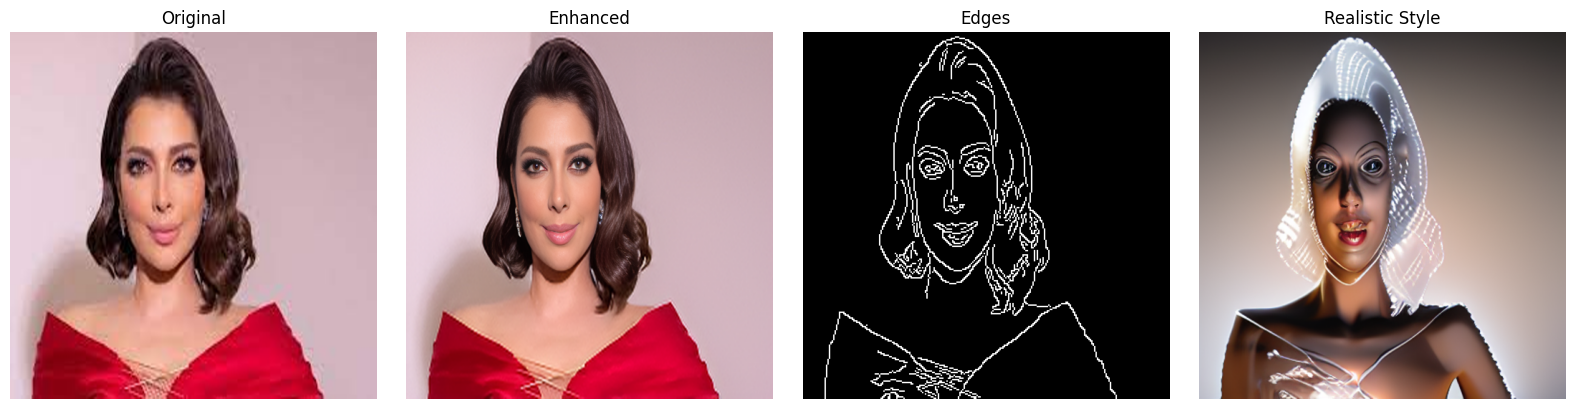

Done! 🎉


In [31]:
"""
Complete Image Style Transformation System
- Handles image uploads
- Enhances image quality
- Recommends styles using AI
- Transforms images to selected styles
- Displays results with quality metrics
"""


class ImageTransformer:
    def __init__(self):
        """Initialize models with memory management"""
        torch.cuda.empty_cache()

        # Load ControlNet
        self.controlnet = ControlNetModel.from_pretrained(
            "lllyasviel/sd-controlnet-canny",
            torch_dtype=torch.float16
        ).to("cuda")

        # Load Pipeline
        self.pipe = StableDiffusionControlNetPipeline.from_pretrained(
            "runwayml/stable-diffusion-v1-5",
            controlnet=self.controlnet,
            torch_dtype=torch.float16,
            safety_checker=None
        ).to("cuda")

        self.pipe.scheduler = UniPCMultistepScheduler.from_config(self.pipe.scheduler.config)
        self.pipe.enable_xformers_memory_efficient_attention()

        # Load CLIP
        self.clip_model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to("cuda")
        self.clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

    def clear_folders(self):
        """Clean temporary folders"""
        folders = ['./input', './output']
        for folder in folders:
            if os.path.exists(folder):
                shutil.rmtree(folder)
            os.makedirs(folder, exist_ok=True)

    def enhance_image(self, image_path):
        """Enhance image quality with face restoration"""
        try:
            self.clear_folders()
            img = Image.open(image_path).convert("RGB")
            img.save('./input/image.png')

            # Run enhancement command
            cmd = (
                "python /content/CodeFormer/inference_codeformer.py "
                "--input_path ./input "
                "--output_path ./output "
                "--bg_upsampler realesrgan "
                "--face_upsample "
                "--fidelity_weight 0.5 "
                "--upscale 1"
            )
            get_ipython().system(cmd)

            enhanced_images = glob.glob("./output/final_results/*.png")
            return Image.open(enhanced_images[0]).resize((512, 512)) if enhanced_images else img.resize((512, 512))

        except Exception as e:
            print(f"Enhancement failed: {e}")
            return Image.open(image_path).convert("RGB").resize((512, 512))

    def analyze_image(self, image):
        """Recommend styles using CLIP analysis"""
        try:
            small_img = image.resize((224, 224))

            inputs = self.clip_processor(
                text=list(style_prompts.keys()),
                images=small_img,
                return_tensors="pt",
                padding=True,
                truncation=True
            ).to("cuda")

            with torch.no_grad():
                outputs = self.clip_model(**inputs)

            probs = outputs.logits_per_image.softmax(dim=1).cpu().numpy()[0]
            top_indices = np.argsort(probs)[-3:][::-1]
            return [(list(style_prompts.keys())[i], probs[i]) for i in top_indices]

        except Exception as e:
            print(f"Analysis failed: {e}")
            return [("Realistic", 0.5), ("Cartoon", 0.3), ("Anime", 0.2)]

    def apply_canny(self, image):
        """Edge detection for style transfer"""
        try:
            img = np.array(image.resize((256, 256)))
            edges = cv2.Canny(img, 100, 200)
            return Image.fromarray(np.stack([edges]*3, axis=-1))
        except Exception as e:
            print(f"Edge detection failed: {e}")
            return image.convert("L").convert("RGB")

    def transform_style(self, image, style_name):
        """Apply style transformation"""
        try:
            torch.cuda.empty_cache()
            edges = self.apply_canny(image)
            small_img = image.resize((384, 384))
            small_edges = edges.resize((384, 384))

            result = self.pipe(
                prompt=style_prompts[style_name],
                image=small_edges,
                negative_prompt="blurry, low quality",
                num_inference_steps=20,
                guidance_scale=7.5,
                height=384,
                width=384
            ).images[0]

            return result.resize(image.size)

        except Exception as e:
            print(f"Style transformation failed: {e}")
            return image

def display_results(original, enhanced, edges, transformed, style_name):
    """Visualize transformation pipeline"""
    plt.figure(figsize=(16, 4))

    titles = ["Original", "Enhanced", "Edges", f"{style_name} Style"]
    images = [original, enhanced, edges, transformed]

    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, 4, i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def calculate_quality_metrics(original, enhanced):
    """Calculate image quality metrics"""
    to_tensor = transforms.ToTensor()
    original_tensor = to_tensor(original).unsqueeze(0).to("cuda")
    enhanced_tensor = to_tensor(enhanced).unsqueeze(0).to("cuda")

    psnr = piq.psnr(original_tensor, enhanced_tensor)
    ssim = piq.ssim(original_tensor, enhanced_tensor, data_range=1.0)

    loss_fn = lpips.LPIPS(net='alex').to("cuda")
    lpips_score = loss_fn(original_tensor, enhanced_tensor)

    print("\nQuality Metrics:")
    print(f"PSNR: {psnr.item():.2f} dB (Higher better)")
    print(f"SSIM: {ssim.item():.4f} (1.0 is perfect)")
    print(f"LPIPS: {lpips_score.item():.4f} (0.0 is perfect)")

    return psnr.item(), ssim.item(), lpips_score.item()

# Main execution
if __name__ == "__main__":
    # 1. Upload image
    print("Please upload an image...")
    uploaded = files.upload()
    while len(uploaded) != 1:
        print("Please upload exactly one image!")
        uploaded = files.upload()

    image_path = list(uploaded.keys())[0]
    original = Image.open(image_path).convert("RGB").resize((512, 512))

    # 2. Show menu
    print("\nSelect transformation:")
    print("1. AI Style Recommendation")
    print("2. Cartoon")
    print("3. Anime")
    print("4. Realistic")
    print("5. Surreal")
    print("6. Custom Prompt")

    choice = input("\nEnter choice (1-6): ").strip()

    # 3. Initialize transformer
    print("Loading models...")
    transformer = ImageTransformer()

    # 4. Enhance image
    print("Enhancing image...")
    enhanced = transformer.enhance_image(image_path)

    # 5. Calculate metrics
    calculate_quality_metrics(original, enhanced)

    # 6. Handle style selection
    if choice == "1":
        print("Analyzing image for recommendations...")
        styles = transformer.analyze_image(enhanced)

        print("\nRecommended Styles:")
        for i, (style, prob) in enumerate(styles, 1):
            print(f"{i}. {style} ({prob*100:.1f}%)")

        style_choice = input("\nSelect style number: ").strip()
        try:
            selected_style = styles[int(style_choice)-1][0]
        except:
            selected_style = styles[0][0]
    elif choice == "2":
        selected_style = "Cartoon"
    elif choice == "3":
        selected_style = "Anime"
    elif choice == "4":
        selected_style = "Realistic"
    elif choice == "5":
        selected_style = "Surreal"
    elif choice == "6":
        selected_style = input("Enter custom prompt: ").strip()
    else:
        selected_style = "Realistic"

    # 7. Apply transformation
    print(f"\nApplying {selected_style} style...")
    edges = transformer.apply_canny(enhanced)
    transformed = transformer.transform_style(enhanced, selected_style)

    # 8. Show results
    print("\nFinal Results:")
    display_results(original, enhanced, edges, transformed, selected_style)

    # Cleanup
    torch.cuda.empty_cache()
    print("Done! 🎉")